In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

#!pip install missingno
import missingno as msno
from datetime import date

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [52]:
data=pd.read_csv('US_Accidents_March23.csv')

In [53]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865,-84.059,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928,-82.831,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900,NaN,100.000,29.650,10.000,Calm,NaN,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063,-84.033,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000,33.300,100.000,29.670,10.000,SW,3.500,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.748,-84.206,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.100,31.000,96.000,29.640,9.000,SW,4.600,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.628,-84.188,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.000,33.300,89.000,29.650,6.000,SW,3.500,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [55]:
data["Start_Time"]=pd.to_datetime(data["Start_Time"],errors="coerce")
data["End_Time"]=pd.to_datetime(data["End_Time"],errors="coerce")
data["Weather_Timestamp"]=pd.to_datetime(data["Weather_Timestamp"],errors="coerce")

In [56]:
data.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7728394.000,6985228,6985228,7728394.000,7728394.000,4325632.000,4325632.000,7728394.000,7608166,7564541.000,5729375.000,7554250.000,7587715.000,7551296.000,7157161.000,5524808.000
mean,2.212,2020-03-21 21:49:59.056443136,2020-03-22 04:56:51.646936064,36.201,-94.703,36.262,-95.726,0.562,2020-06-02 10:06:41.888674560,61.663,58.251,64.831,29.539,9.090,7.685,0.008
min,1.000,2016-01-14 20:18:33,2016-02-08 06:37:08,24.555,-124.624,24.566,-124.546,0.000,2016-01-14 19:51:00,-89.000,-89.000,1.000,0.000,0.000,0.000,0.000
25%,2.000,2018-09-17 02:20:31.750000128,2018-09-17 05:23:37.500000,33.400,-117.219,33.462,-117.754,0.000,2018-11-20 18:35:00,49.000,43.000,48.000,29.370,10.000,4.600,0.000
50%,2.000,2020-06-23 13:37:23.500000,2020-06-23 15:20:42,35.824,-87.767,36.183,-88.028,0.030,2020-11-10 13:53:00,64.000,62.000,67.000,29.860,10.000,7.000,0.000
75%,2.000,2021-10-28 15:44:07,2021-10-29 14:57:46.500000,40.085,-80.354,40.179,-80.247,0.464,2022-01-19 14:27:00,76.000,75.000,84.000,30.030,10.000,10.400,0.000
max,4.000,2023-03-31 23:30:00,2023-03-31 23:59:00,49.002,-67.113,49.075,-67.109,441.750,2023-03-31 23:53:00,207.000,207.000,100.000,58.630,140.000,1087.000,36.470
std,0.488,NaN,NaN,5.076,17.392,5.273,18.108,1.777,NaN,19.014,22.390,22.821,1.006,2.688,5.425,0.110


In [57]:
data['Severity'].value_counts(normalize=True)

Severity
2   0.797
3   0.168
4   0.026
1   0.009
Name: proportion, dtype: float64

C:\Users\himek\AppData\Local\Temp\ipykernel_24652\202875177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity',data=data,palette="pastel")


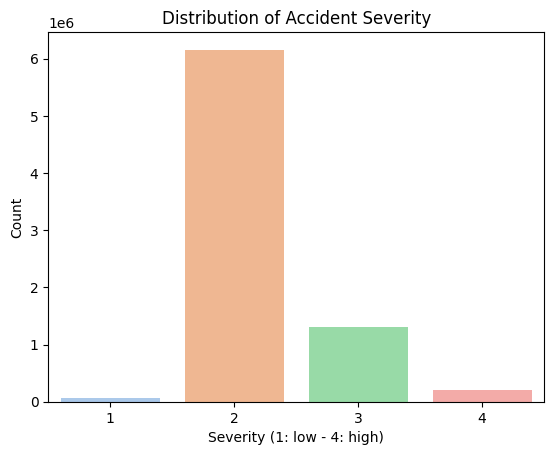

In [58]:
sns.countplot(x='Severity',data=data,palette="pastel")
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity (1: low - 4: high)")
plt.ylabel("Count")
plt.show()

C:\Users\himek\AppData\Local\Temp\ipykernel_24652\669812445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a_cities.values,y=a_cities.index,palette="pastel")


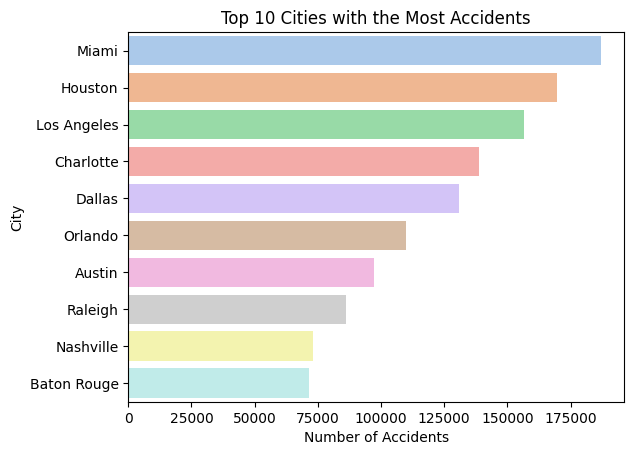

In [59]:
a_cities=data['City'].value_counts().head(10)
sns.barplot(x=a_cities.values,y=a_cities.index,palette="pastel")
plt.title('Top 10 Cities with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.show()

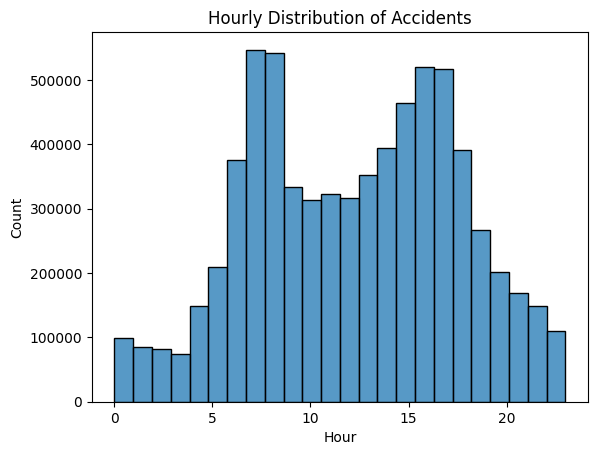

In [60]:
data['Hour']=data['Start_Time'].dt.hour
sns.histplot(data['Hour'],bins=24,kde=False)
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour')
plt.show()

C:\Users\himek\AppData\Local\Temp\ipykernel_24652\772549148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Weekday',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette="viridis")


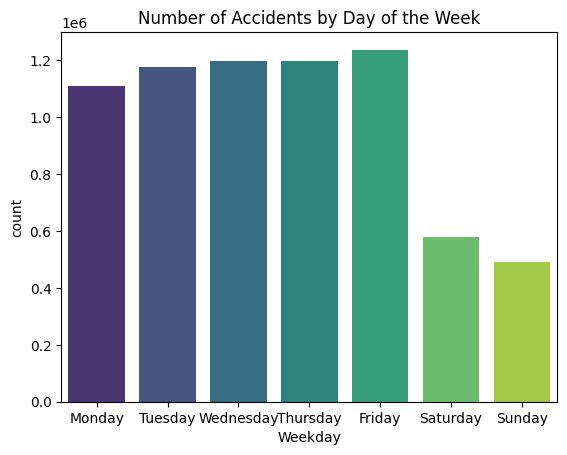

In [61]:
data['Weekday']=data['Start_Time'].dt.day_name()
sns.countplot(data=data, x='Weekday',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette="viridis")
plt.title('Number of Accidents by Day of the Week')
plt.show()

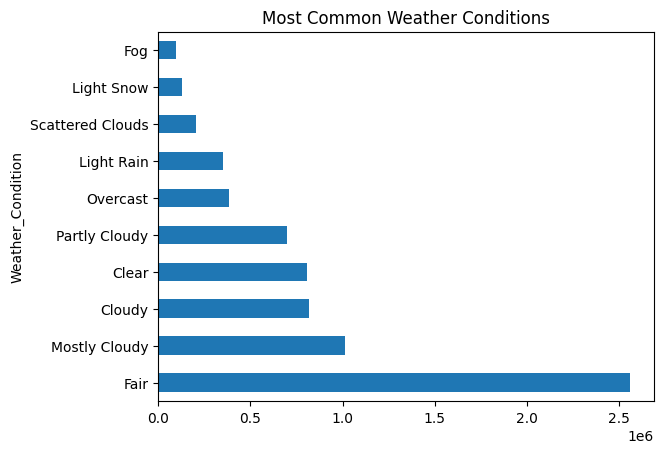

In [62]:
data['Weather_Condition'].value_counts().head(10).plot(kind='barh')
plt.title("Most Common Weather Conditions")
plt.show()

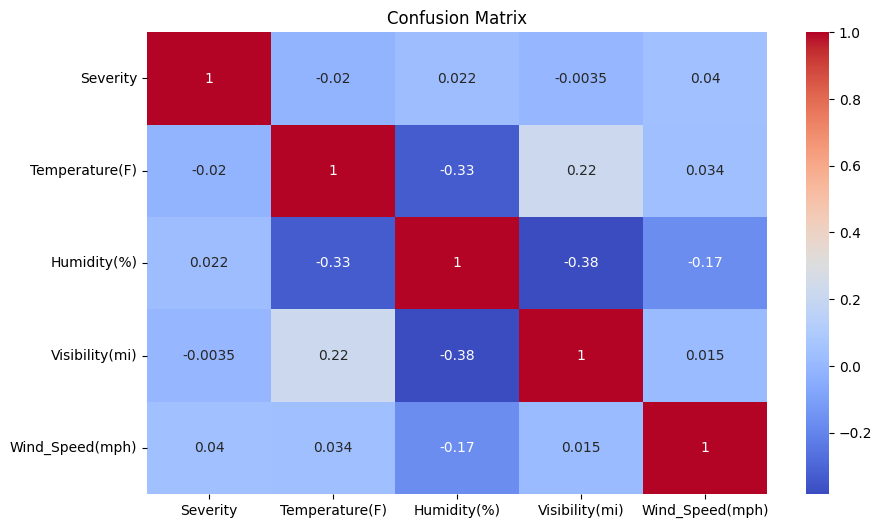

In [63]:
cols=['Severity','Temperature(F)','Humidity(%)','Visibility(mi)','Wind_Speed(mph)']
plt.figure(figsize=(10,6))
sns.heatmap(data[cols].corr(),annot=True,cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

In [64]:
def grab_col_names (dataframe, cat_trh=10, car_thr=20):
    cat_cols= [col for  col in dataframe.columns if dataframe[col].dtype =='O']
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique() < cat_trh and dataframe[col].dtype != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_thr and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols= [col for col in  dataframe.columns if dataframe[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [65]:
print(data['Weather_Condition'].value_counts())

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64


In [66]:
def group_weather(condition):
    if pd.isnull(condition):
        return 'Unknown'
    condition=condition.lower()
    if 'rain' in condition or 'storm' in condition:
        return 'Rainy'
    elif 'snow' in condition or 'ice' in condition:
        return 'Snowy'
    elif 'cloud' in condition or 'overcast' in condition:
        return 'Cloudy'
    elif 'fog' in condition or 'haze' in condition:
        return 'Foggy'
    elif 'clear' in condition or 'fair' in condition:
        return 'Clear'
    else:
        return 'Other'

data['Weather_Condition']=data['Weather_Condition'].apply(group_weather)

In [67]:
a_states=data['State'].value_counts().nlargest(10).index
data['a_states']=data['State'].apply(lambda x:x if x in a_states else 'Other')

In [68]:
data=data.drop(['ID', 'Source', 'Description', 'Street','Country','Zipcode', 'Airport_Code','City','County','End_Time','Timezone'],axis=1)

In [69]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [70]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [71]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [72]:
for col in num_cols:
    print(col, check_outlier(data, col))

C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Time False
Start_Lat False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Lng False
End_Lat False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


End_Lng False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Distance(mi) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Weather_Timestamp False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Temperature(F) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Wind_Chill(F) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Humidity(%) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Pressure(in) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Visibility(mi) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Wind_Speed(mph) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Precipitation(in) True
Hour False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


In [73]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [74]:
for col in num_cols:
    data = remove_outlier(data, col)

In [75]:
for col in num_cols:
    print(col, check_outlier(data, col))

C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Time False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Lat False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Lng False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


End_Lat False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


End_Lng False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Distance(mi) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Weather_Timestamp False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Temperature(F) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Wind_Chill(F) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Humidity(%) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Pressure(in) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Visibility(mi) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Wind_Speed(mph) True


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Precipitation(in) False
Hour False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


In [76]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [77]:
for col in num_cols:
    replace_with_thresholds(data, col)

In [78]:
for col in num_cols:
    print(col, check_outlier(data, col))

C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Time False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Lat False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Start_Lng False
End_Lat False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


End_Lng False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Distance(mi) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Weather_Timestamp False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Temperature(F) False
Wind_Chill(F) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Humidity(%) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Pressure(in) False
Visibility(mi) False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


Wind_Speed(mph) False
Precipitation(in) False
Hour False


C:\Users\himek\AppData\Local\Temp\ipykernel_24652\4129770718.py:3: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


In [79]:
data.isnull().sum()

Severity                       0
Start_Time                417388
Start_Lat                      0
Start_Lng                      0
End_Lat                  2399035
End_Lng                  2399035
Distance(mi)                   0
State                          0
Weather_Timestamp          98663
Temperature(F)            126141
Wind_Chill(F)            1480848
Humidity(%)               130445
Pressure(in)              114300
Visibility(mi)            142359
Wind_Direction            134245
Wind_Speed(mph)           405064
Precipitation(in)        1699680
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

In [80]:
data=data.drop(columns=['Start_Time','State'])

In [81]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [82]:
(data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)  

End_Lat                 48.770
End_Lng                 48.770
Precipitation(in)       34.552
Wind_Chill(F)           30.104
Weekday                  8.485
Hour                     8.485
Wind_Speed(mph)          8.234
Visibility(mi)           2.894
Wind_Direction           2.729
Humidity(%)              2.652
Temperature(F)           2.564
Pressure(in)             2.324
Weather_Timestamp        2.006
Astronomical_Twilight    0.244
Nautical_Twilight        0.244
Civil_Twilight           0.244
Sunrise_Sunset           0.244
Traffic_Calming          0.000
Traffic_Signal           0.000
Severity                 0.000
Turning_Loop             0.000
Station                  0.000
Stop                     0.000
Crossing                 0.000
Roundabout               0.000
Railway                  0.000
No_Exit                  0.000
Junction                 0.000
Give_Way                 0.000
Start_Lat                0.000
Bump                     0.000
Amenity                  0.000
Weather_

In [83]:
data.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)','Wind_Direction'], inplace=True)

In [84]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [85]:
for col in num_cols:
    data[col]=data[col].fillna(data[col].median())

for col in cat_cols:
    data[col]=data[col].fillna(data[col].mode()[0])

In [86]:
missing = data.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


In [87]:
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,a_states
1,2,39.928,-82.831,0.010,2016-02-08 05:51:00,37.900,100.000,29.650,10.000,7.000,Rainy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,6.000,Monday,Other
2,2,39.063,-84.033,0.010,2016-02-08 06:56:00,36.000,100.000,29.670,10.000,3.500,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,6.000,Monday,Other
13,2,39.791,-84.242,0.010,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,8.000,Monday,Other
17,2,39.752,-84.240,0.000,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,9.000,Monday,Other
18,2,39.741,-84.184,0.010,2016-02-08 09:38:00,37.400,93.000,29.630,10.000,6.900,Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,9.000,Monday,Other


In [88]:
label_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col]) 

In [89]:
data=pd.get_dummies(data,columns=['Weather_Condition','a_states','Weekday'])


In [90]:
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Foggy,Weather_Condition_Other,Weather_Condition_Rainy,Weather_Condition_Snowy,Weather_Condition_Unknown,a_states_CA,a_states_FL,a_states_MN,a_states_NC,a_states_NY,a_states_OR,a_states_Other,a_states_PA,a_states_SC,a_states_TX,a_states_VA,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
1,2,39.928,-82.831,0.010,2016-02-08 05:51:00,37.900,100.000,29.650,10.000,7.000,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,0,6.000,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,2,39.063,-84.033,0.010,2016-02-08 06:56:00,36.000,100.000,29.670,10.000,3.500,False,False,False,False,False,False,False,False,False,False,False,True,False,1,1,0,0,6.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
13,2,39.791,-84.242,0.010,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,8.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
17,2,39.752,-84.240,0.000,2016-02-08 08:56:00,36.000,89.000,29.650,10.000,5.800,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,9.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
18,2,39.741,-84.184,0.010,2016-02-08 09:38:00,37.400,93.000,29.630,10.000,6.900,False,False,True,False,False,False,False,False,False,False,False,True,False,0,0,0,0,9.000,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [91]:

y=data['Severity']

X=data.drop('Severity',axis=1)

In [92]:
X = X.drop(columns=["Weather_Timestamp"])

In [93]:
from sklearn.preprocessing import MinMaxScaler

scalem=MinMaxScaler()
X=scalem.fit_transform(X)

print(X)

[[0.62882999 0.72669388 0.02030457 ... 0.         0.         0.        ]
 [0.59345155 0.70580342 0.02030457 ... 0.         0.         0.        ]
 [0.6232139  0.70217038 0.02030457 ... 0.         0.         0.        ]
 ...
 [0.33591137 0.12998933 0.68629442 ... 0.         0.         0.        ]
 [0.37716279 0.11782237 1.         ... 0.         0.         0.        ]
 [0.3860394  0.10816799 1.         ... 0.         0.         0.        ]]


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(min_samples_split=11)
dtc.fit(X_train,y_train)
print(dtc.score(X_test,y_test))

0.8596967349917567


In [96]:
y_predict=dtc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8596967349917567

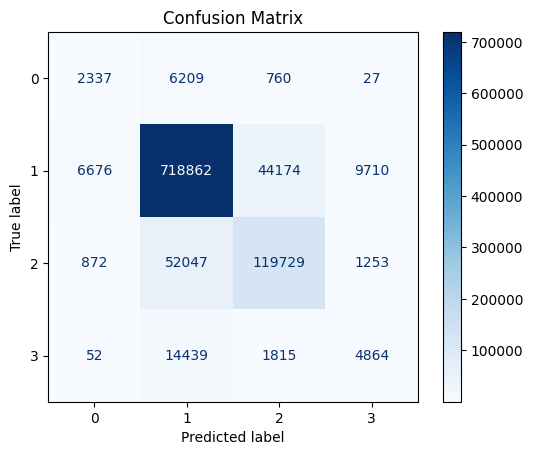

In [97]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_predict)
cmdisp=ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           1     0.2352    0.2504    0.2426      9333
           2     0.9082    0.9223    0.9152    779422
           3     0.7192    0.6885    0.7035    173901
           4     0.3068    0.2298    0.2627     21170

    accuracy                         0.8597    983826
   macro avg     0.5423    0.5227    0.5310    983826
weighted avg     0.8554    0.8597    0.8573    983826

